In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import sqlite3
import glob
from matplotlib import pyplot as plt

def get_grid_cell(lat_lon):
    lat=float(lat_lon[0])
    lon=float(lat_lon[1])
    h = 30
    w = h * 2
    cell_x = int((lon) / (360) * w)
    cell_y = int((lat + 90) / (180) * h)
    return (cell_x,cell_y)

/Users/hari/.pyenv/versions/3.6.5/envs/covid/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [25]:
def plot_map(column):
    conn = sqlite3.connect("covid.db")
    df_all = pd.read_sql("select * from daily_latlon",conn)
    conn.close()
    df_all=df_all.sort_values('Date')
    df_plot=df_all[['Country','Latitude','Longitude','Confirmed','Deaths','Recovered']].fillna(0)
    df_plot['Infected'] = df_plot['Confirmed']-(df_plot['Recovered']-df_plot['Deaths'])
    df_plot['lat_long'] = df_plot[['Latitude', 'Longitude']].apply(get_grid_cell, axis=1)
    df_plot['x']=df_plot['lat_long'].str[0]
    df_plot['y']=df_plot['lat_long'].str[1]
    plt.figure(figsize=(60,30))
    sns.set(style="white")
    sns.set_context("poster")
    c=sns.scatterplot(x='x',y='y',data=df_plot,hue='Country',size=column,sizes=(1000,8000),legend=False)
    c.set_xlabel("Count",fontsize=30)
    c.set_ylabel("Date",fontsize=30)
    for item in c.get_xticklabels():
        item.set_rotation(90)
        item.set_size(30)
    for item in c.get_yticklabels():
        item.set_size(30)

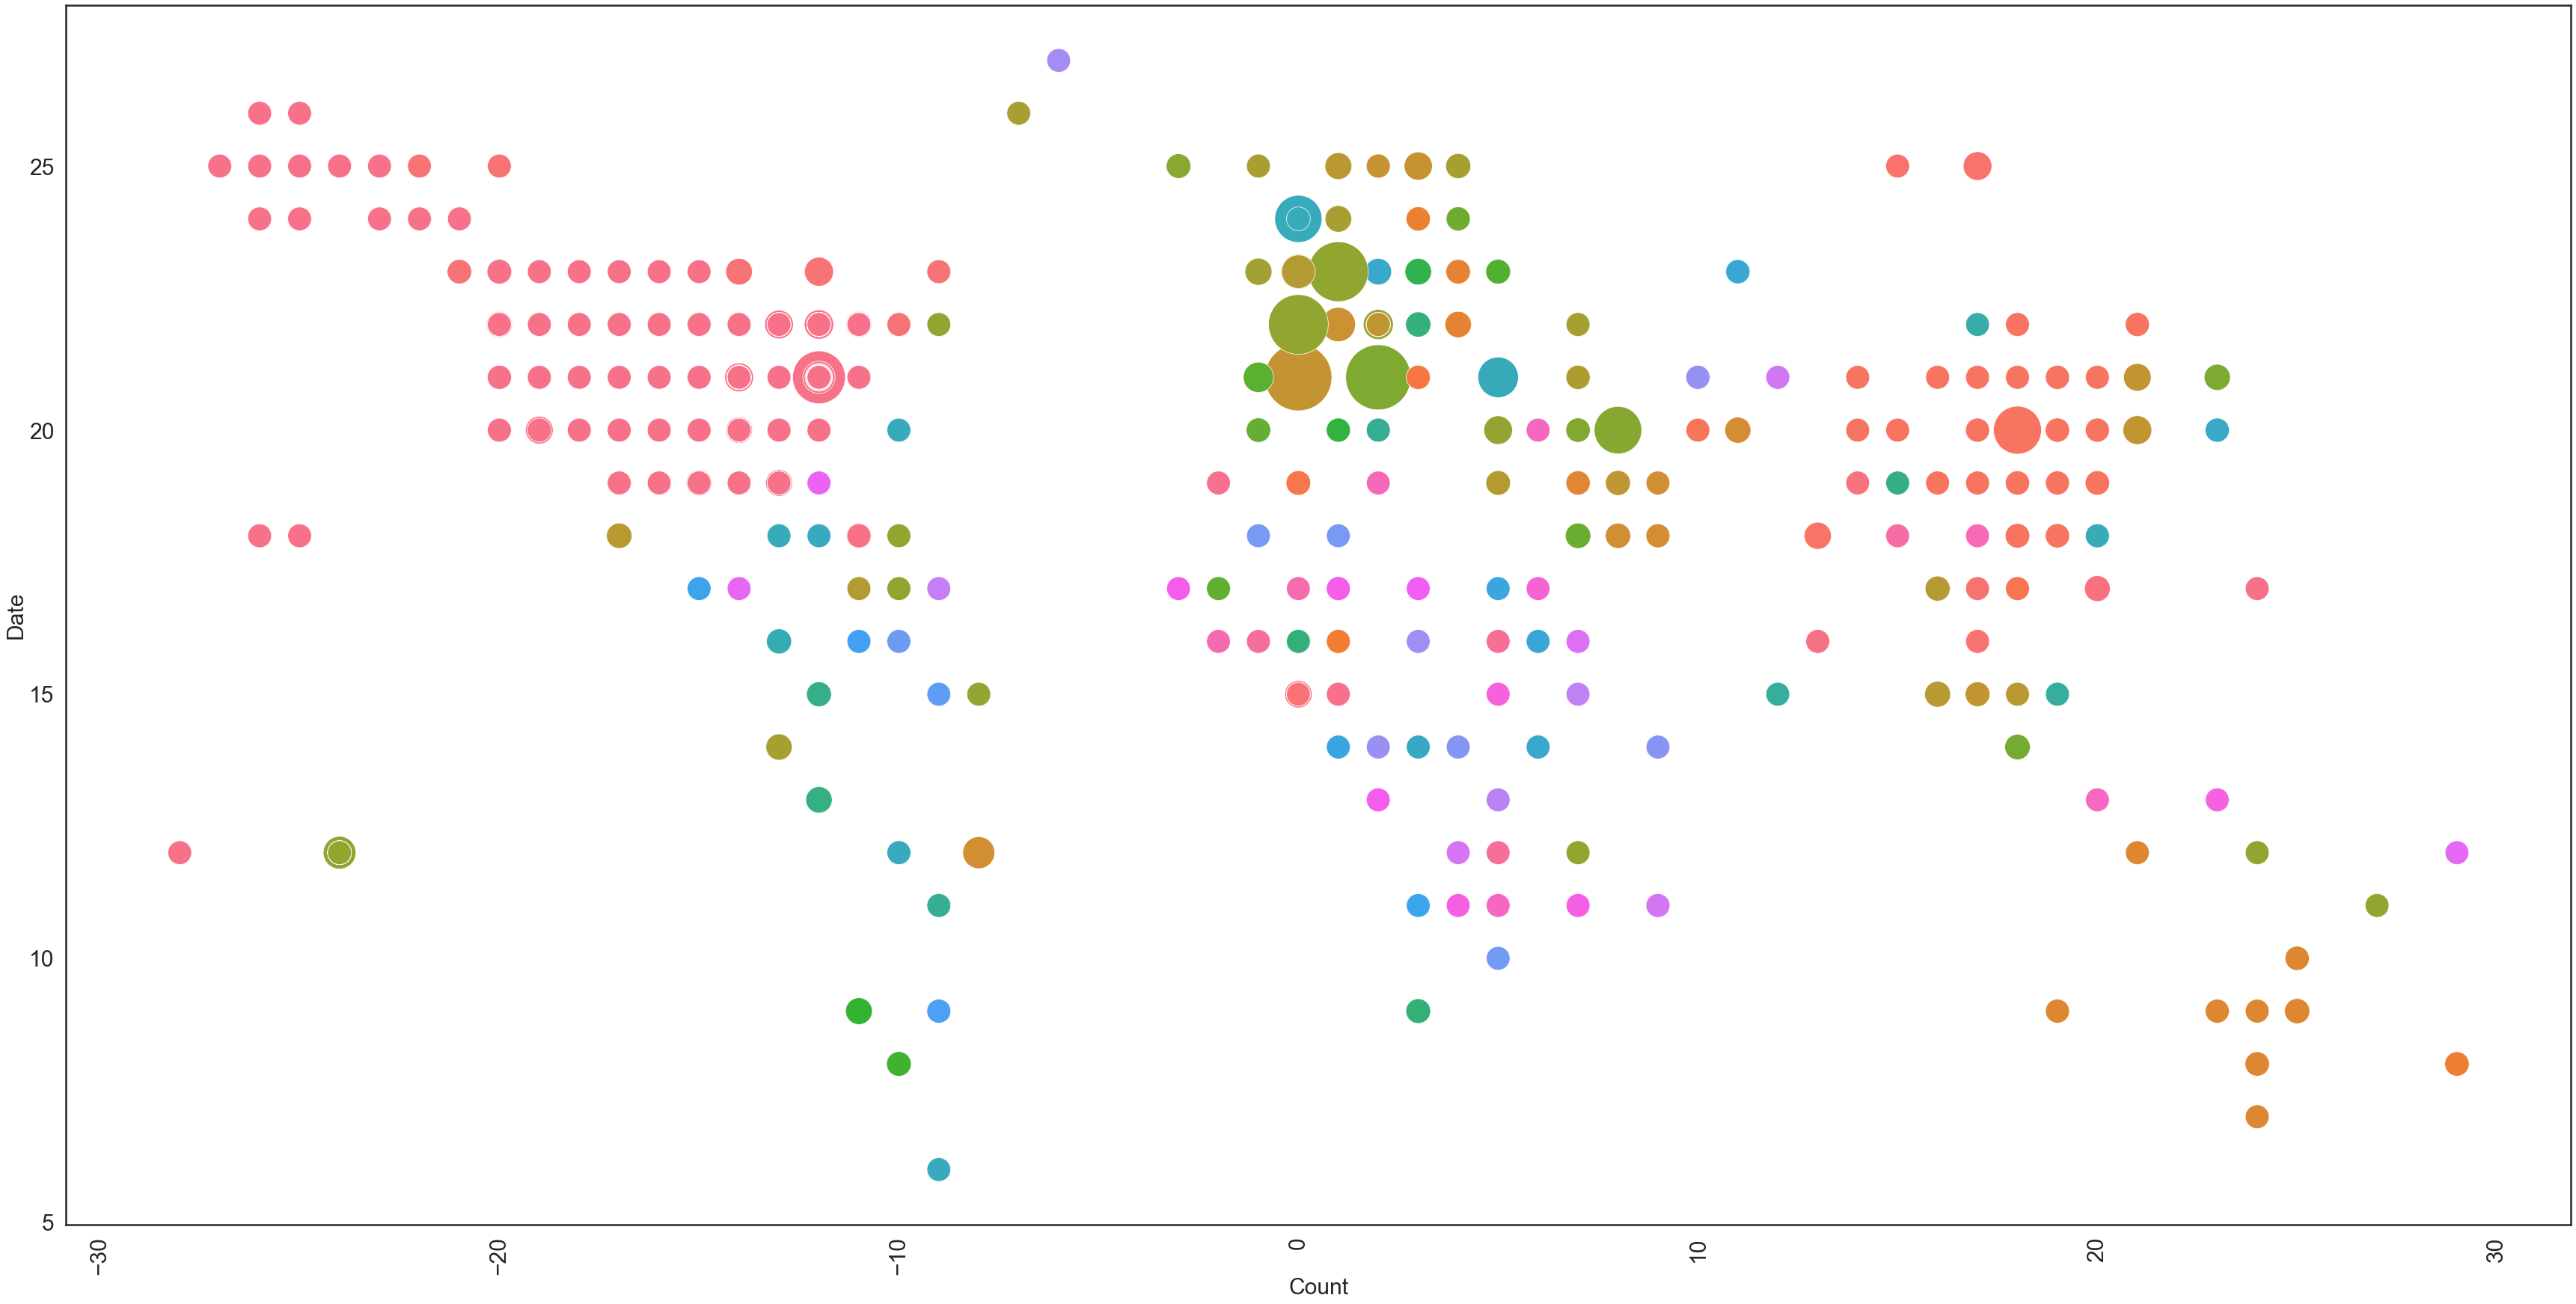

In [26]:
plot_map('Confirmed')